SIGNATURE VERIFICATION 

IMPORT THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from glob import glob



READING THE DATA PATH (SigComp Dataset)

In [2]:
IMAGE_SIZE = [224, 224]

train_path = r"G:\Signature Verification Project\Writer independent\sign_data\train"
test_path  = r"G:\Signature Verification Project\Writer independent\sign_data\test"

DATA AUGMENTATION

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

TRAINING DATASET

In [4]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1149 images belonging to 2 classes.


TESTING DATASET

In [5]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'FORGED': 0, 'GENUINE': 1}

In [7]:
test_set.class_indices


{'FORGED': 0, 'GENUINE': 1}

DATA AUGMENTED IMAGES




In [8]:
def Show_Image(img_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()

  for img,ax in zip(img_arr,axes):
    ax.imshow(img)
  
  plt.tight_layout()
  plt.show()

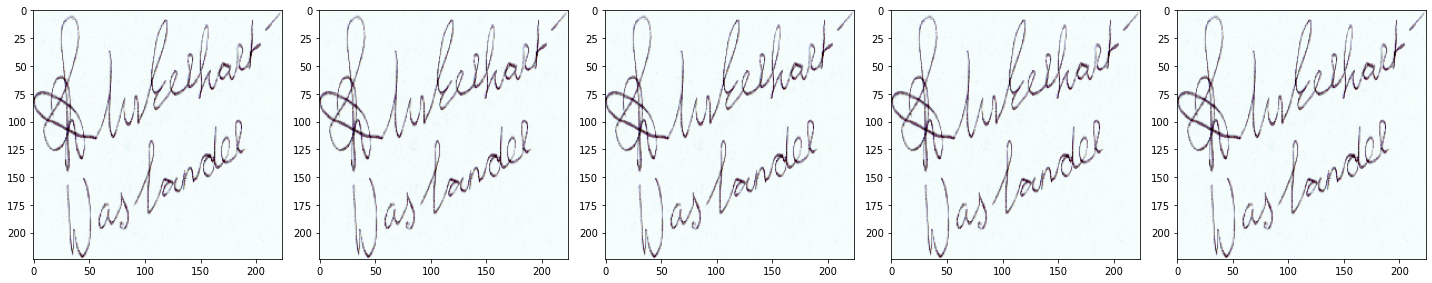

In [9]:
images=[training_set[0][0][0] for i in range(6)]
Show_Image(images)

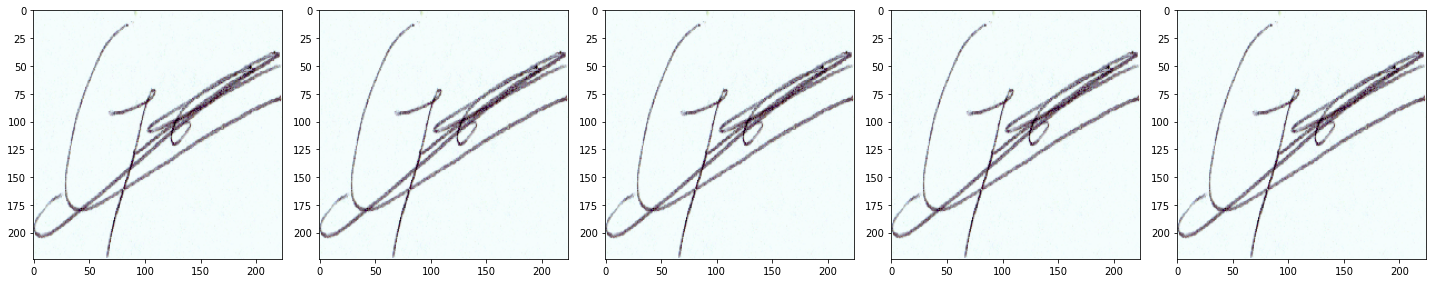

In [10]:
images=[test_set[0][0][0] for i in range(6)]
Show_Image(images)

MOBILENETV2 MODEL FOR TRAINING

In [11]:
model_mobilenet=MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9412608/9406464 [==============================] - 13s 1us/step


In [12]:
for layer in model_mobilenet.layers:
    layer.trainable = False

In [13]:
folders = glob(r"G:\Signature Verification Project\Writer independent\sign_data\train\*")

In [14]:
folders

['G:\\Signature Verification Project\\Writer independent\\sign_data\\train\\FORGED',
 'G:\\Signature Verification Project\\Writer independent\\sign_data\\train\\GENUINE']

In [15]:
x = Flatten()(model_mobilenet.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)


In [17]:
model = Model(model_mobilenet.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=[tensorflow.keras.metrics.AUC(),"accuracy"])


MODEL TRAINING

In [20]:
result = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
36/36 [==============================] - 67s 2s/step - loss: 2.5117 - auc: 0.7990 - accuracy: 0.7476 - val_loss: 1.9710 - val_auc: 0.8630 - val_accuracy: 0.8280
Epoch 2/50
36/36 [==============================] - 53s 1s/step - loss: 0.4435 - auc: 0.9642 - accuracy: 0.9426 - val_loss: 1.8577 - val_auc: 0.8708 - val_accuracy: 0.8300
Epoch 3/50
36/36 [==============================] - 50s 1s/step - loss: 0.0803 - auc: 0.9943 - accuracy: 0.9843 - val_loss: 2.0361 - val_auc: 0.8566 - val_accuracy: 0.8200
Epoch 4/50
36/36 [==============================] - 50s 1s/step - loss: 0.0165 - auc: 0.9982 - accuracy: 0.9956 - val_loss: 3.3403 - val_auc: 0.7877 - val_accuracy: 0.7600
Epoch 5/50
36/36 [==============================] - 50s 1s/step - loss: 0.0121 - auc: 0.9999 - accuracy: 0.9956 - val_loss: 2.6507 - val_auc: 0.8176 - val_accuracy: 0.7840
Epoch 6/50
36/36 [==============================] - 50s 1s/step - loss: 0.0014 - auc: 1.0000 - accuracy: 1.0000 - val_loss: 1.9513 - val_auc

LOSS AND ACCURACY

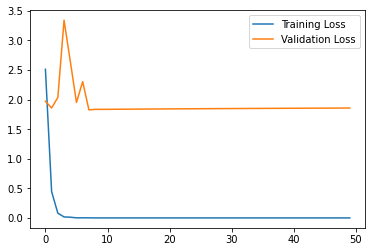

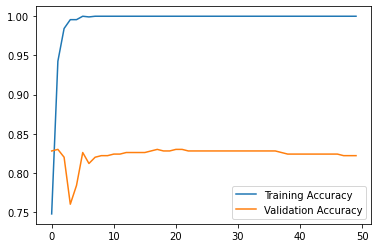

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('Loss_Value')


plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_Value')

THE FINAL MODEL

In [ ]:
##model.save(r"G:\Signature Verification Project\Writer independent\Model_MobileNetV2.h5')